In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

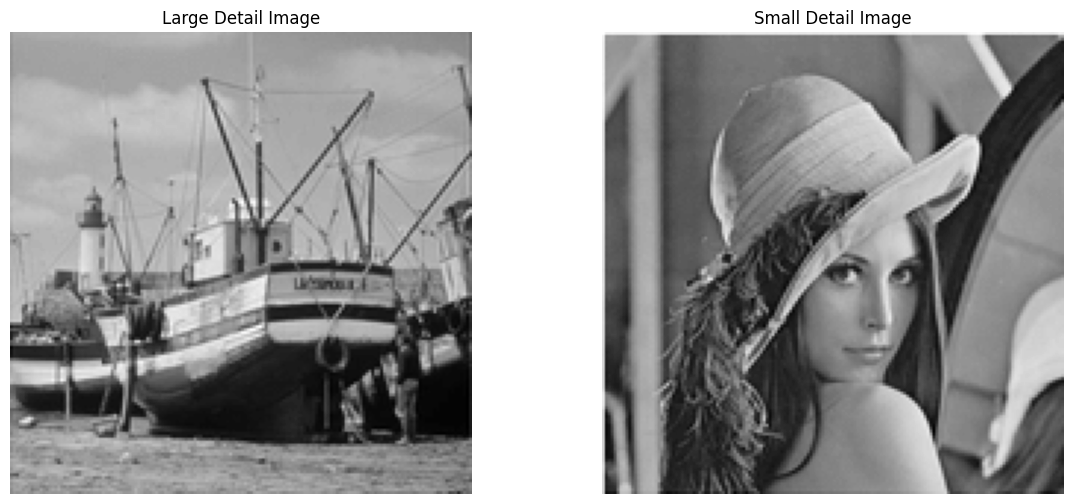

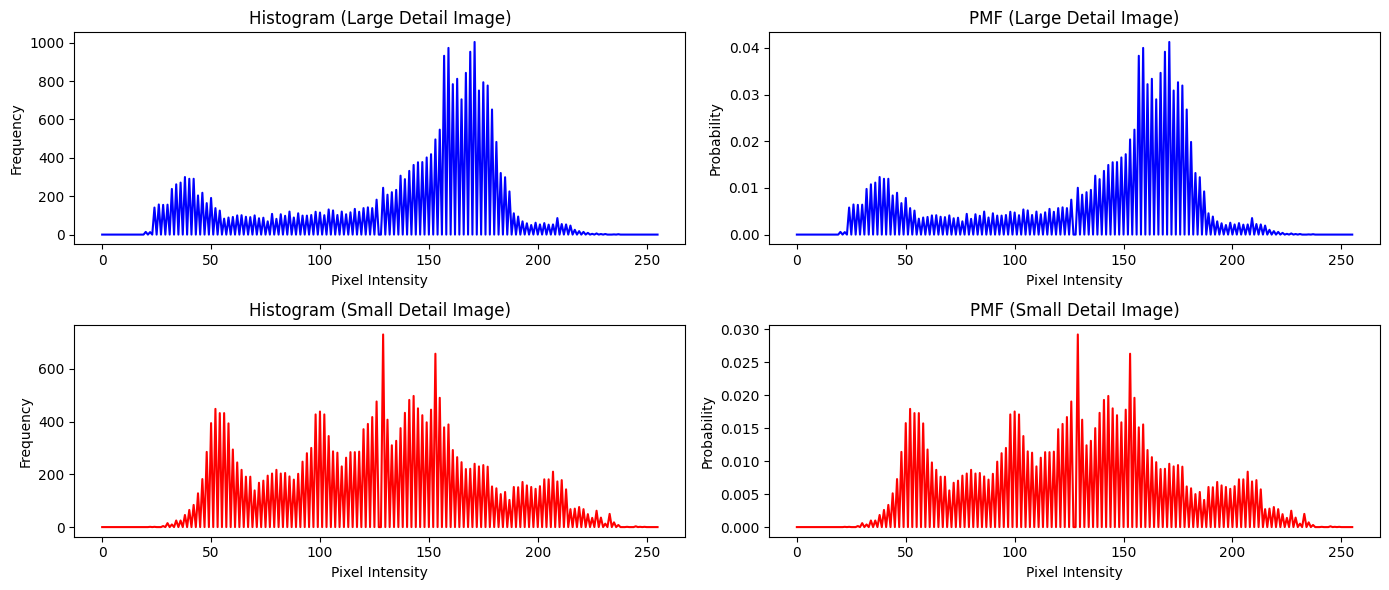

Entropy (Large Detail Image): 6.069855005561475 bits
Entropy (Small Detail Image): 6.4142233118811545 bits


In [7]:
image_large_detail = cv2.imread("large_detail.png", cv2.IMREAD_GRAYSCALE)
image_small_detail = cv2.imread("small_detail.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_large_detail, cmap='gray')
plt.title("Large Detail Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_small_detail, cmap='gray')
plt.title("Small Detail Image")
plt.axis("off")

plt.show()

def calculate_histogram(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    return hist

def calculate_pmf(hist):
    total_pixels = np.sum(hist)
    pmf = hist / total_pixels
    return pmf

def calculate_entropy(pmf):
    entropy = -np.sum([p * np.log2(p) for p in pmf if p > 0])
    return entropy
    
hist_large = calculate_histogram(image_large_detail)
pmf_large = calculate_pmf(hist_large)
entropy_large = calculate_entropy(pmf_large)

hist_small = calculate_histogram(image_small_detail)
pmf_small = calculate_pmf(hist_small)
entropy_small = calculate_entropy(pmf_small)

plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
plt.plot(hist_large, color='blue')
plt.title("Histogram (Large Detail Image)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.subplot(2, 2, 2)
plt.plot(pmf_large, color='blue')
plt.title("PMF (Large Detail Image)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Probability")

plt.subplot(2, 2, 3)
plt.plot(hist_small, color='red')
plt.title("Histogram (Small Detail Image)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.subplot(2, 2, 4)
plt.plot(pmf_small, color='red')
plt.title("PMF (Small Detail Image)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Probability")

plt.tight_layout()
plt.show()

print(f"Entropy (Large Detail Image): {entropy_large} bits")
print(f"Entropy (Small Detail Image): {entropy_small} bits")